# Understanding Bayes' Rule

Bayes' Rule describes how to update the probability of an event \(A\) based on new evidence \(B\). It is given by the following formula:

$$
P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}
$$

Where:
- \(P(A|B)\): The **posterior probability**, or the probability of event \(A\) occurring given that \(B\) has occurred.
- \(P(B|A)\): The **likelihood**, or the probability of observing \(B\) given that \(A\) is true.
- \(P(A)\): The **prior probability**, or the initial probability of event \(A\).
- \(P(B)\): The **evidence**, or the total probability of observing \(B\).

### Example: COVID-19 Testing

Let's apply Bayes' Rule to the case of a **COVID-19 test**. Suppose:
- \(P(D)\) is the **prior probability** that a person has COVID-19 (prevalence).
- \(P(P|D)\) is the **likelihood** that a person with COVID-19 tests positive.
- \(P(P)\) is the total probability that anyone tests positive.

Using Bayes' Rule, we calculate the **posterior probability**:

$$
P(D|P) = \frac{P(P|D) \cdot P(D)}{P(P)}
$$

Where:
- \(P(D|P)\) is the probability that the person has COVID-19 given a positive test result.
- \(P(P|D)\) is the probability that the person tests positive given they have COVID-19 (True Positive Rate).
- \(P(D)\) is the prior probability that a person has COVID-19.
- \(P(P)\) is the total probability of a positive test result.

In [1]:
# Bayes' Rule: Disease Testing Example

# Given values
P_disease = 0.01         # 1% of population has the disease
P_positive_given_disease = 0.99  # True positive rate (sensitivity)
P_positive_given_no_disease = 0.05  # False positive rate (1 - specificity)

# Step 1: Compute P(positive)
P_no_disease = 1 - P_disease
P_positive = (P_positive_given_disease * P_disease) + (P_positive_given_no_disease * P_no_disease)

# Step 2: Apply Bayes' Rule
P_disease_given_positive = (P_positive_given_disease * P_disease) / P_positive

# Output
print(f"Probability of having the disease given a positive test: {P_disease_given_positive:.4f}")

Probability of having the disease given a positive test: 0.1667


# Floating-point Math problems

## Why do languages like Python, C, C++, etc. struggle with floating-point math?

The issue is not a bug, but a fundamental limitation of how floating-point numbers are represented in binary.

### 1. Floating-point numbers ≠ real numbers

Computers use finite binary representations to approximate real numbers. But many simple decimal numbers (like `0.1`, `0.01`, `0.3`) cannot be exactly represented in binary — just like 1/3 can't be exactly written in decimal (`0.333...`).

### 2. Example: Decimal 0.1 in binary

In binary, `0.1` becomes a repeating fraction:

$$
0.1_{10} = 0.00011001100110011001100…_2
$$

It repeats forever. But the computer can only store a finite number of bits, so it rounds to the nearest available binary float.

So even though you typed 0.1, internally it’s stored more like:

```python
0.10000000000000000555...
```

### 3. These small rounding errors add up

When you perform math operations (like Bayes' Rule), especially involving multiplication or subtraction of very close values, these rounding errors become visible:

```python
>>> 0.1 + 0.2
0.30000000000000004
```

### 4. Why doesn’t Python "just round it off"?

Python does round when printing — most of the time.

```python
>>> print(0.1 + 0.2)
0.3
```

But:
- When inspecting the raw value (`repr()`), you’ll see the full precision.
- Sometimes cumulative operations (like in loops or stats) make the error visible even when printing.

## Basic Calculation Example

Let’s perform some basic operations with `0.1` and `0.2` to see how floating-point imprecision shows up.

In [3]:
# Basic floating-point calculation: 0.1 + 0.2
result = 0.1 + 0.2
result

0.30000000000000004

As you can see, the result is `0.30000000000000004` instead of exactly `0.3`. This happens due to how the numbers are represented internally.

---

## Rounding in Python

While floating-point imprecision is unavoidable in most cases, we can use Python's built-in `round()` function to round the result for display purposes. Let's see an example.

In [4]:
# Round the result to 2 decimal places
rounded_result = round(result, 2)
rounded_result

0.3

By rounding the result to 2 decimal places, we get `0.3`, which is the expected result. This is helpful when you're only concerned with **displaying** the result, not with the exact internal representation.

---

## Visualizing Floating-Point Precision in Calculations

Finally, let’s create a plot to visualize how the floating-point error grows over multiple operations. We'll compute the sum of `0.1` added to itself multiple times and see how the error accumulates.

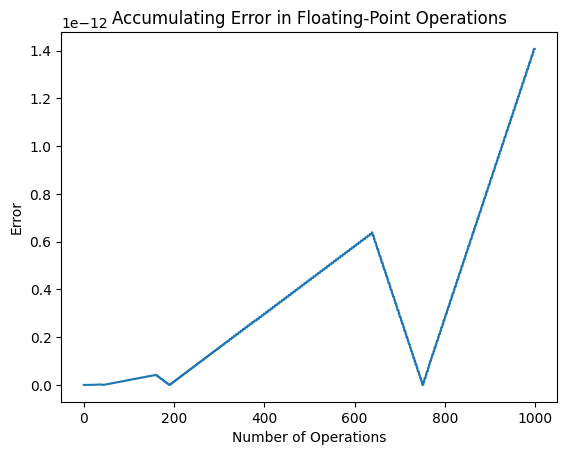

In [6]:
import matplotlib.pyplot as plt

# Calculate cumulative sum of 0.1 added 1000 times
errors = []
sum_value = 0
for i in range(1000):
    sum_value += 0.1
    errors.append(abs(sum_value - (i + 1) * 0.1))  # Error compared to the expected value

# Plot the error
plt.plot(errors)
plt.title('Accumulating Error in Floating-Point Operations')
plt.xlabel('Number of Operations')
plt.ylabel('Error')
plt.show()


In the plot, you can see how the floating-point error grows with each addition of `0.1`. Even though `0.1` is a simple number, its representation in binary causes small errors to accumulate over many operations.

---

## Conclusion

- Floating-point imprecision is a result of how numbers are stored in binary.
- For simple operations, the error might be negligible, but for more complex calculations (like Bayes' Rule or statistical models), the error can accumulate.
- Use rounding for display purposes, the `decimal` module for high precision, and `math.isclose()` for comparisons.

This is just the beginning of understanding floating-point arithmetic and how it affects computational models. We’ll continue exploring how to mitigate these issues in more advanced algorithms.